In [ ]:
#Description : this program detects breast cancer ,based off of data 

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Load the data 
from google.colab import files
uploaded=files.upload()
df = pd.read_csv('data.csv')
df.head(7)

In [ ]:
#count the number of colum and row in data set
df.shape

(569, 33)

In [ ]:
#count the number of empty( NaN, NAN, na) value in each column
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#drop all the column with all missing value
df =df.dropna(axis=1)

In [ ]:
#get the new count of the number of rows and columns
df.shape

(569, 32)

In [ ]:
#get a count of the number of malignant (M) or Benign (B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

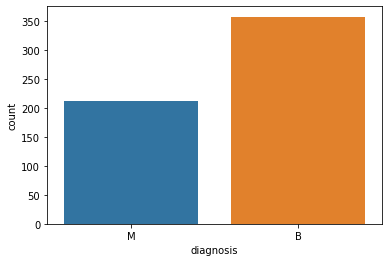

In [ ]:
#visualize the count

sns.countplot(df['diagnosis'],label='count')


In [ ]:
#look at the data type to see which columns need to be encoded
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#encoder the categorical data values
 from sklearn.preprocessing import LabelEncoder
labelencode_Y =LabelEncoder()
df.iloc[:,1] labelencode_Y.fit_transform(df.iloc[:,1].values)

IndentationError: ignored

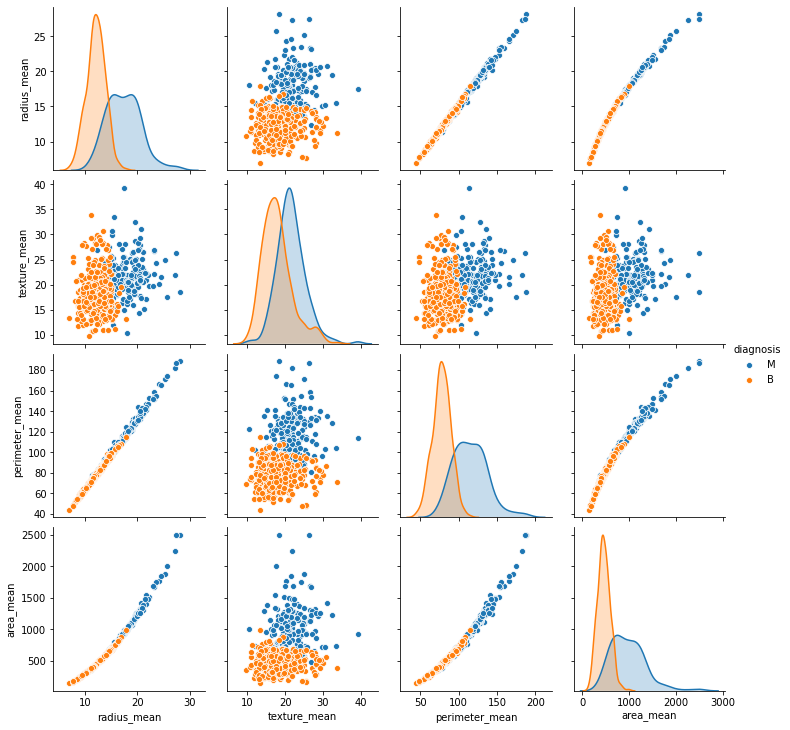

In [ ]:
#create a pair plot
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [ ]:
#print the first 5 row of the new data
df.head(5) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#get the col-relation of the columns
df.iloc[:,1:12].corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


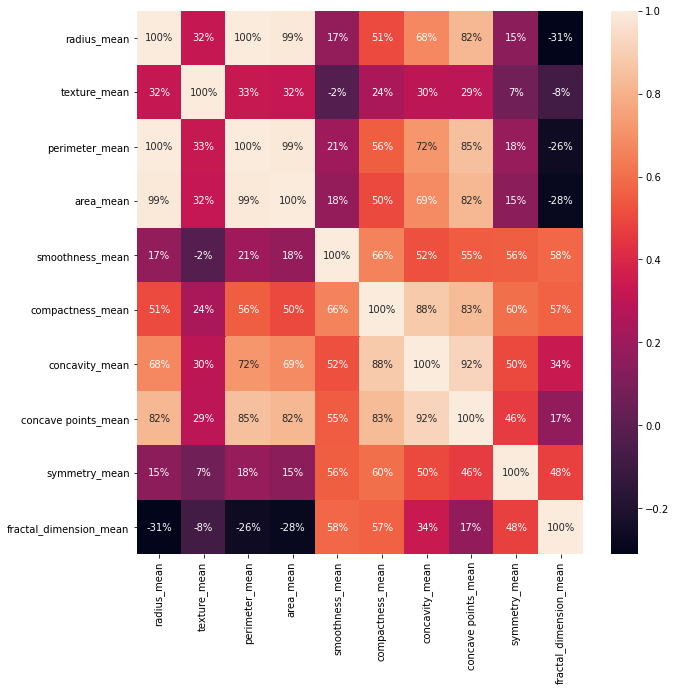

In [ ]:
#visualization the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True, fmt='.0%')

In [ ]:
#Splite the data set into independent (X) and dependent (Y) data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values

In [ ]:
#split the data set into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25 ,random_state=0)

In [ ]:
#Scale the data ( Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train =sc.fit_transform(x_train)
X_test =sc.fit_transform(x_test)

NameError: ignored

In [ ]:
# create a function for the models
def models(X_train, Y_train):

  #Logstic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion ='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Print the model accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy:',forest.score(X_train, Y_train))
  
  return log, tree, forest

In [ ]:
#getting all of the models
model= models(X_train, Y_train)



[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953051643192489


In [ ]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import  confusion_matrix

for i in range (len(model)):
   print('model', i)
   cm = confusion_matrix(Y_test, model[0].predict(X_test))
   TP = cm[0][0] 
   TN = cm[1][1]
   FN = cm[1][0]
   FP = cm[1][1]
   print(cm)
   print('Testing Accuracy = ', (TP+TN)/(TP + TN+ FN+ FP))
   print()


model 0
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.7195767195767195

model 1
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.7195767195767195

model 2
[[86  4]
 [ 3 50]]
Testing Accuracy =  0.7195767195767195



In [ ]:
#show another way to get matrics of the model
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range (len(model)):
  print('model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

              precision    recall  f1-score   support

           B       0.97      0.96      0.96        90
           M       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951


In [ ]:
#print the predicat of random Forest classification Model
pred = model[2].predict(X_test)
print(pred)
print()
print(Y_test)

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M']

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 